# Imports

Payoff Matrix (Player 1 payoff, Player 2 payoff):
         C        D
C   (5, 5)  (0, 20)
D  (20, 0)   (1, 1)



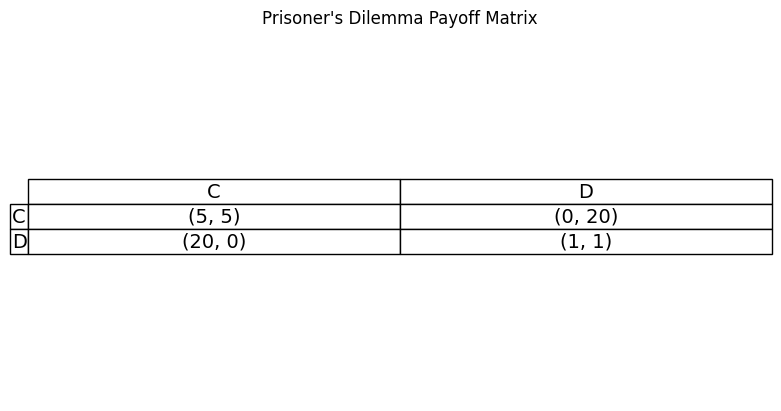

Checking Strict Dominance...
C is strictly dominated by D (Player 1)
C is strictly dominated by D (Player 2)

Checking Weak Dominance...

Best Responses:
Player 1: {'C': ['D'], 'D': ['D']}
Player 2: {'C': ['D'], 'D': ['D']}

Rationalizable Strategies (Remaining Matrix):
C is strictly dominated by D (Player 1)
C is strictly dominated by D (Player 2)
Payoff Matrix (Player 1 payoff, Player 2 payoff):
        D
D  (1, 1)



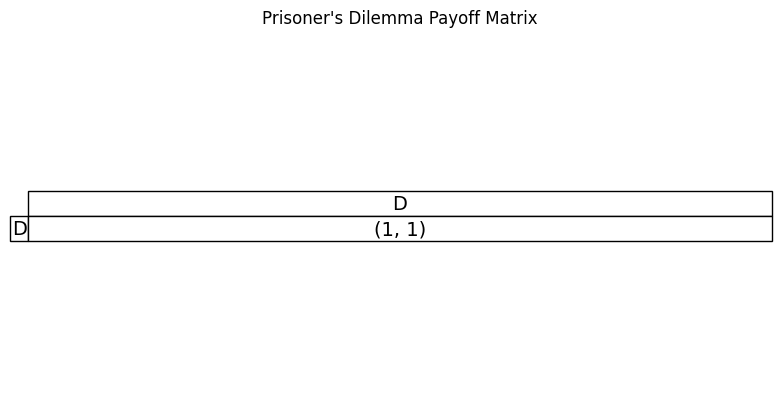

(3, 2)


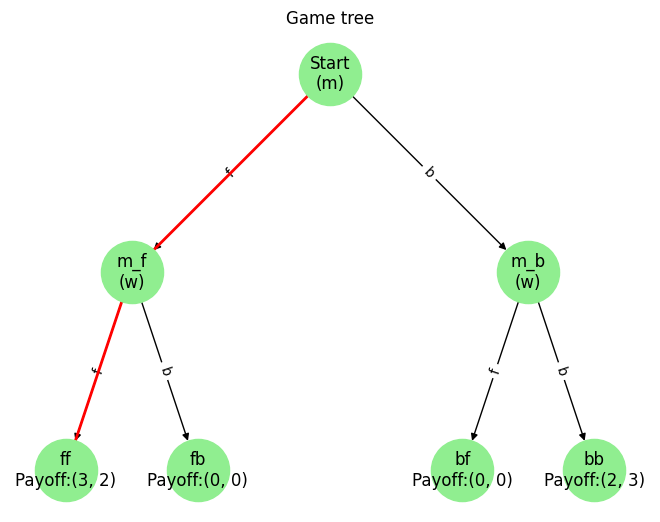

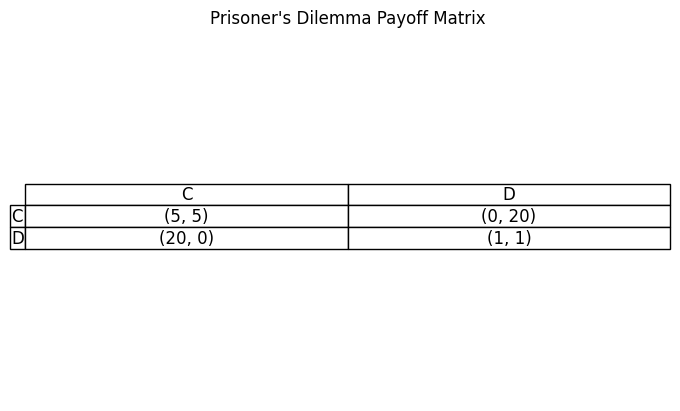

=== Nash Equilibria ===
Strategy: Player 1 = D, Player 2 = D, Payoff = (1, 1)
Prisoner's Dilemma (Normal Form):
 Player 2        C        D
Player 1                  
C          (5, 5)  (0, 20)
D         (20, 0)   (1, 1)


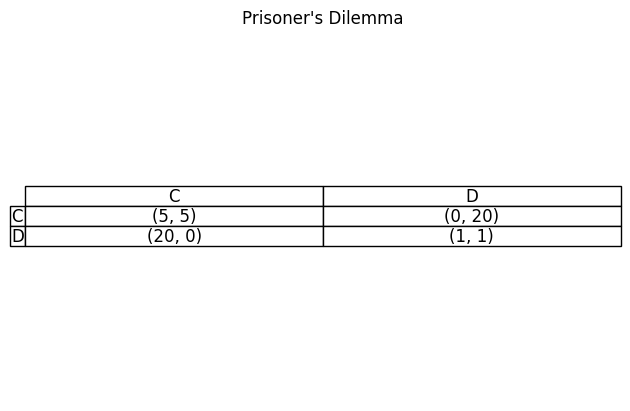

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from Dominance_and_Rationalizability import *
from Extensive_Form import Games as ExtensiveGames
from Mixed_Strategies_and_Expected_Payoffs import calculate_N_payoffs
from Nash_Equilibrium_Computation_and_Output import find_nash_equilibria
from Normal_Form_and_User_Input import *

# Display Normal Form

In [2]:
print(" NORMAL FORM REPRESENTATION")
strategies_p1 = ['C', 'D']
strategies_p2 = ['C', 'D']
payoff_matrix = {
    ('C', 'C'): (5, 5),
    ('C', 'D'): (0, 20),
    ('D', 'C'): (20, 0),
    ('D', 'D'): (1, 1),
}
df = pd.DataFrame([[payoff_matrix[(r, c)] for c in strategies_p2] for r in strategies_p1],
                  index=strategies_p1, columns=strategies_p2)
print(df)

 NORMAL FORM REPRESENTATION
         C        D
C   (5, 5)  (0, 20)
D  (20, 0)   (1, 1)


# Display Extensive Form


 EXTENSIVE FORM: Prisoner's Dilemma Tree


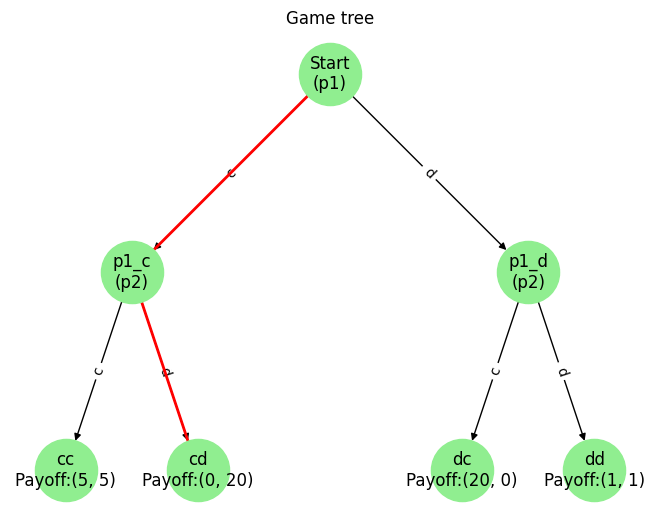

(0, 20)

In [3]:
print("\n EXTENSIVE FORM: Prisoner's Dilemma Tree")
ext_game = ExtensiveGames()
ext_game.build_prisoners_dilemma('c', 'd', show_plot=True)

# Dominance and Rationalizability


 DOMINANCE & RATIONALIZABILITY
Payoff Matrix (Player 1 payoff, Player 2 payoff):
         C        D
C   (5, 5)  (0, 20)
D  (20, 0)   (1, 1)



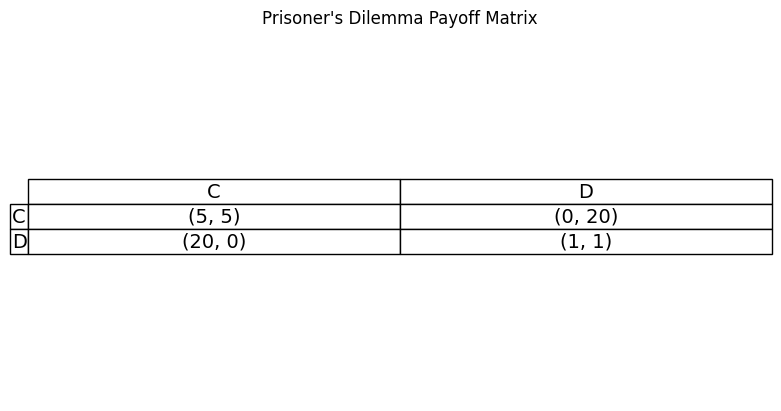

Checking Strict Dominance...
C is strictly dominated by D (Player 1)
C is strictly dominated by D (Player 2)

Checking Weak Dominance...

Best Responses:
Player 1: {'C': ['D'], 'D': ['D']}
Player 2: {'C': ['D'], 'D': ['D']}

Rationalizable Strategies:
C is strictly dominated by D (Player 1)
C is strictly dominated by D (Player 2)
Payoff Matrix (Player 1 payoff, Player 2 payoff):
        D
D  (1, 1)



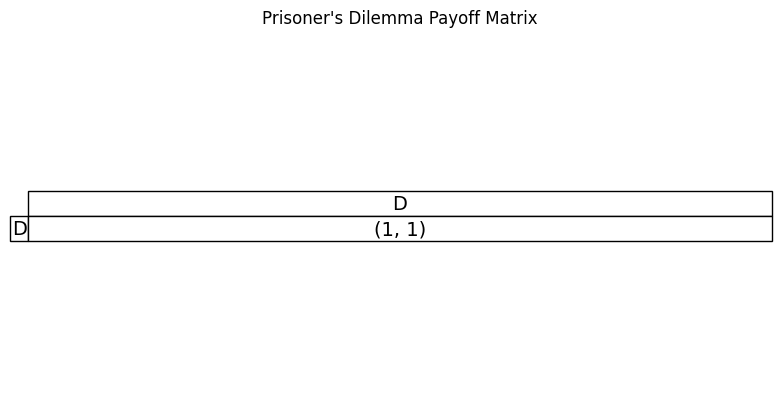

In [4]:
print("\n DOMINANCE & RATIONALIZABILITY")
print_payoff_matrix(df)
print("Checking Strict Dominance...")
strict_dom_p1 = check_dominance(1, df, 'strict')
strict_dom_p2 = check_dominance(2, df, 'strict')

print("\nChecking Weak Dominance...")
weak_dom_p1 = check_dominance(1, df, 'weak', ignore_strategies=strict_dom_p1)
weak_dom_p2 = check_dominance(2, df, 'weak', ignore_strategies=strict_dom_p2)

print("\nBest Responses:")
br1 = best_responses(1, df)
br2 = best_responses(2, df)
print("Player 1:", br1)
print("Player 2:", br2)

print("\nRationalizable Strategies:")
rat_df = rationalizable_strategies(df)
print_payoff_matrix(rat_df)


# Mixed Strategies

In [5]:
print("\n MIXED STRATEGIES & EXPECTED PAYOFFS")
mixed_strategies = [
    {'C': 0.4, 'D': 0.6},  # Player 1
    {'C': 0.5, 'D': 0.5},  # Player 2
]
exp_p1 = calculate_N_payoffs(0, payoff_matrix, mixed_strategies)
exp_p2 = calculate_N_payoffs(1, payoff_matrix, mixed_strategies)
print(f"Expected Payoff (Player 1): {exp_p1}")
print(f"Expected Payoff (Player 2): {exp_p2}")


 MIXED STRATEGIES & EXPECTED PAYOFFS
('C', 'C')
('C', 'D')
('D', 'C')
('D', 'D')
('C', 'C')
('C', 'D')
('D', 'C')
('D', 'D')
Expected Payoff (Player 1): 7.3
Expected Payoff (Player 2): 5.3


# Nash Equilibrium

In [6]:
print("\n NASH EQUILIBRIA")
nash_eqs = find_nash_equilibria(df)
if nash_eqs:
    for eq in nash_eqs:
        print(f"Player 1 = {eq[0]}, Player 2 = {eq[1]}, Payoff = {df.loc[eq[0], eq[1]]}")
else:
    print("No pure strategy Nash Equilibrium found.")


 NASH EQUILIBRIA
Player 1 = D, Player 2 = D, Payoff = (1, 1)
